## Author - Nikita Koshti 

#                             GRIP - THE SPARKS FOUNDATION

### DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP 
(BATCH - APRIL 2021)

### Prediction using Supervised ML

### Task-1 Predict the percentage of an student based on the number of study hours.

In this regression task we will predict the percentage of marks that a student expected to score based on the number of hours he studied. This  is simple linear regression task as it involves only two variables.

### To predict

What will be predicted score if a student studies for 9.25 hrs/day

In [213]:
#importing liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [214]:
#load dataset
datapath="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(datapath)

In [215]:
#showing data
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [216]:
#reading data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [217]:
#describing dataset
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


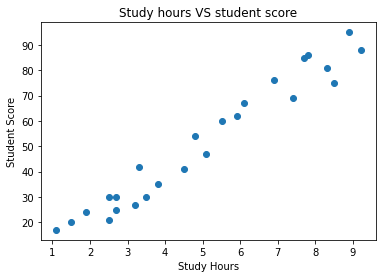

In [218]:
#generating scatter plot and showing it
plt.scatter(x=data.Hours,y=data.Scores)
plt.xlabel("Study Hours")
plt.ylabel("Student Score")
plt.title("Study hours VS student score")
plt.show()

### Prepare the data for machinge learning algorithm

In [219]:
#Data cleaning
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [220]:
#split dataset for training
x=data.drop("Scores",axis="columns")
y=data.drop("Hours",axis="columns")
print("shape of x",x.shape)

print("shape of y",y.shape)

shape of x (25, 1)
shape of y (25, 1)


In [221]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=194)
#test_size defines that how much data we want to test,so i am using 25% data for testing

In [222]:
print("shape of x train",x_train.shape)
print("shape of y train",y_train.shape)
print("shape of x test",x_test.shape)
print("shape of y test",y_test.shape)

shape of x train (18, 1)
shape of y train (18, 1)
shape of x test (7, 1)
shape of y test (7, 1)


###  select a model and train it

In [223]:
#so in above scatter plot as we saw that when the value of x is increasing the value of y is also increasing in a linear forat so we can use linear regression model
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [224]:
LR.fit(x_train,y_train)

LinearRegression()

In [225]:
LR.coef_

array([[9.44937257]])

In [226]:
LR.intercept_

array([3.59919948])

In [227]:
m=9.69
c=2.60
y=m*12+c
y

118.88

In [228]:
LR.predict([[6]])[0][0].round(2)

60.3

In [229]:
y_pred=LR.predict(x_test)
y_pred

array([[73.52455647],
       [55.57074859],
       [77.3043055 ],
       [29.11250541],
       [87.69861532],
       [21.55300736],
       [27.2226309 ]])

In [230]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=["Study_Hours","Student_original_Scores","Student_scores_predicted"])

,Study_Hours,Student_original_Scores,Student_scores_predicted
0,7.4,69.0,73.524556
1,5.5,60.0,55.570749
2,7.8,86.0,77.304305
3,2.7,30.0,29.112505
4,8.9,95.0,87.698615
5,1.9,24.0,21.553007
6,2.5,21.0,27.222631


#### Fine Tuning The model

In [231]:
LR.score(x_test,y_test)

0.9611673143799688

model is giving the accuracy of 96.11%

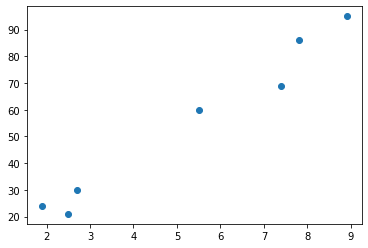

In [237]:
#create scatter plot for test values
plt.scatter(x_test,y_test)

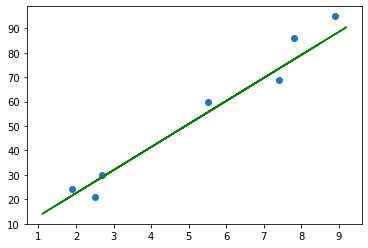

In [238]:
plt.scatter(x_test,y_test)
plt.plot(x_train,LR.predict(x_train),color="Green")

### presenting solution

In [239]:
import joblib as jb
jb.dump(LR,"Student_score_predict")

['Student_score_predict']

In [240]:
model=jb.load("Student_score_predict")

In [241]:
model.predict([[9.25]])

array([[91.00589572]])